In [13]:
# Enable autoreload of module
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


IndexError: index 5 is out of bounds for axis 0 with size 2

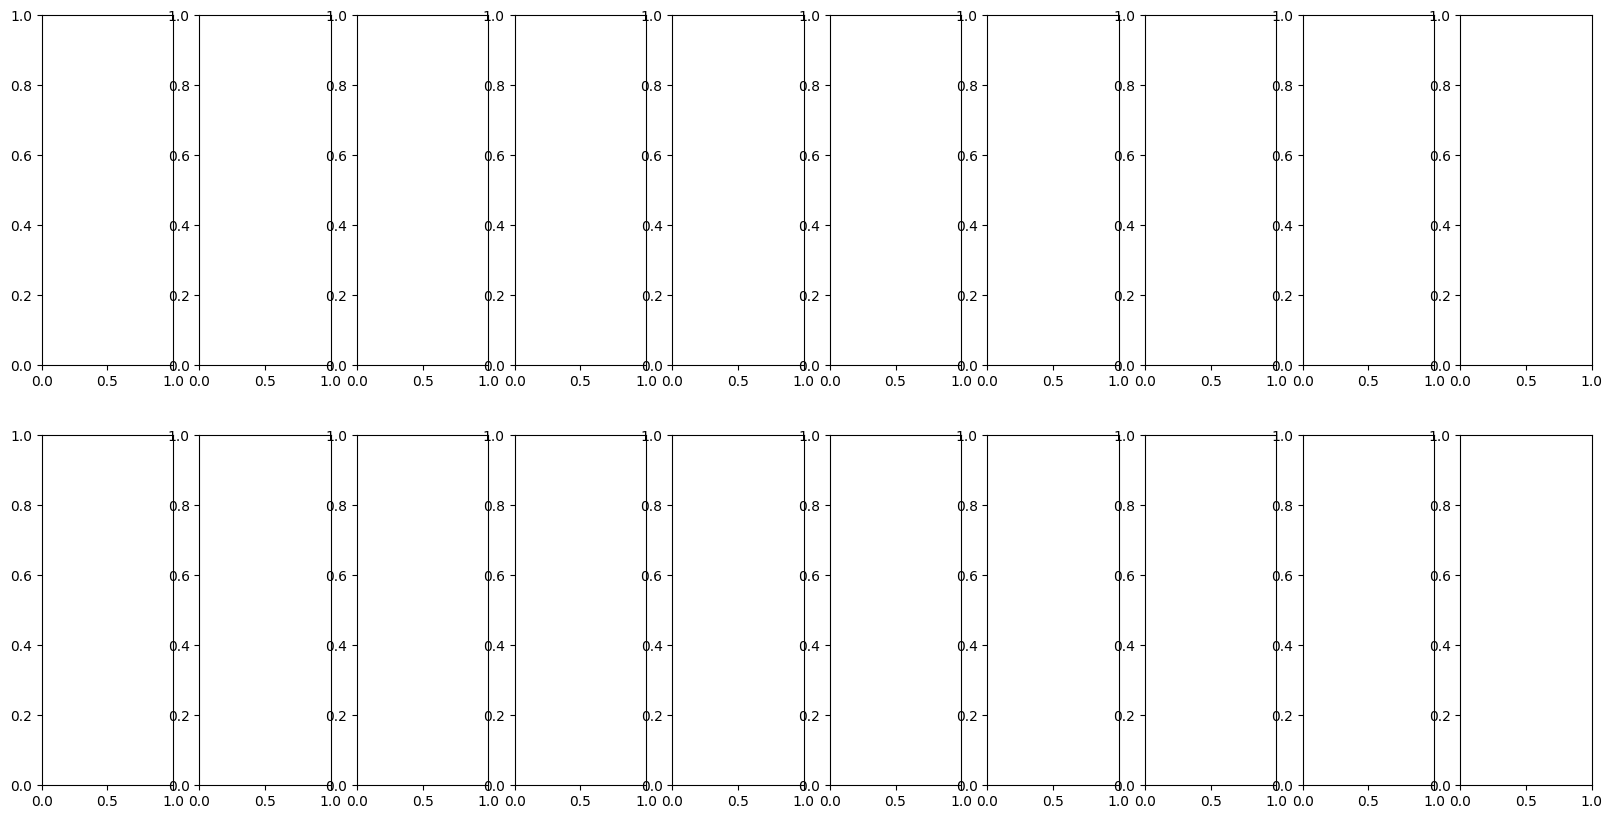

In [34]:
from data.neural_field_datasets import MnistNeFDataset, FlattenTransform, FlattenMinMaxTransform, ModelTransform
import os
import matplotlib.pyplot as plt
from animation.util import reconstruct_image

dir_path = os.path.dirname(os.path.abspath(os.getcwd()))
data_root_dwsnet = os.path.join(dir_path, "adl4cv", "datasets", "DWSNets", "mnist-inrs")
data_root_ours = os.path.join(dir_path, "adl4cv", "datasets", "mnist-nerfs")

idx = range(5, 15)
model_dataset_conditioned = MnistNeFDataset(data_root_ours, type="pretrained",transform=ModelTransform())
model_dataset_unconditioned = MnistNeFDataset(data_root_ours, transform=ModelTransform())
flattened_dataset_conditioned = MnistNeFDataset(data_root_ours, transform=FlattenTransform())
flattened_dataset_unconditioned= MnistNeFDataset(data_root_ours, transform=FlattenTransform())



# Plotting the tensors as heatmaps in grayscale
fig, axes = plt.subplots(2, len(idx), figsize=(20, 10))

for i in range(2):
    for j in idx:
        if i == 0:
            image = reconstruct_image(model_dataset_conditioned[j][0])
        else:
            image = reconstruct_image(model_dataset_unconditioned[j][0])
        axes[i][j].imshow(image, cmap='gray', aspect='auto')
        axes[i][j].set_title('Ground Truth')
        axes[i][j].set_xlabel('X-axis')
        axes[i][j].set_ylabel('Y-axis')

#plt.colorbar(axes[i].imshow(image, cmap='gray', aspect='auto'), ax=axes)
plt.show()



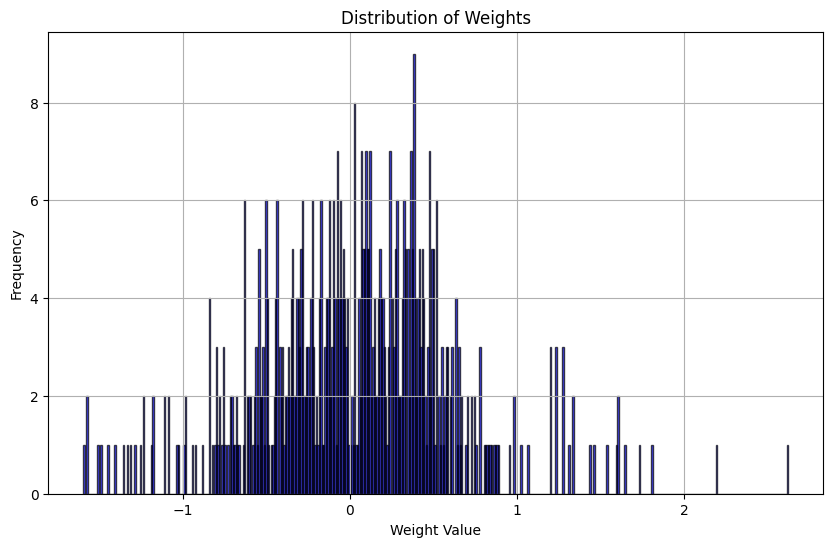

In [17]:
import torch
import matplotlib.pyplot as plt

# Assuming idx, flattened_dataset_conditioned, and flattened_dataset_unconditioned are predefined


# Assuming idx is predefined and is a list of indices
weights_conditioned = torch.Tensor()
weights_unconditioned = torch.Tensor()

for j in idx:
    weights_1d_conditioned = flattened_dataset_conditioned[j][0].numpy()
    weights_conditioned = torch.cat((weights_conditioned, torch.tensor(weights_1d_conditioned)), 0)
    
    weights_1d_unconditioned = flattened_dataset_unconditioned[j][0].numpy()
    weights_unconditioned = torch.cat((weights_unconditioned, torch.tensor(weights_1d_unconditioned)), 0)


# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].hist(weights_conditioned.numpy(), bins=50, color='blue', alpha=0.7, label='Conditioned')
axes[0].set_title('Conditioned Weights Histogram')
axes[0].legend()

axes[1].hist(weights_unconditioned.numpy(), bins=50, color='green', alpha=0.7, label='Unconditioned')
axes[1].set_title('Unconditioned Weights Histogram')
axes[1].legend()

plt.show()
